# Assignment 1 

### Group G28:
Bai, Yunming 03722553<br>
Gao, Yue 03725791<br>
Xu, Qinyang 03721948<br>
Zhu, Qiufan 03726330


# Task 1
(1)

$s^TΣΣ^Ts=$
$[s_1,s_2\cdots,s_p]$
$\left[\begin{array}{cccc}
\sigma_1&\cdots&0\\
 &\ddots& \\
0&\cdots&\sigma_p
\end{array}\right]$
$\left[\begin{array}{cccc}
\sigma_1&\cdots&0\\
 &\ddots& \\
0&\cdots&\sigma_p
\end{array}\right]$
$\left[\begin{array}{cccc}
s_1\\
\vdots\\
s_p
\end{array}\right]$
$=s_1^2\sigma_1^2+\dots s_p^2\sigma_p^2$

because  $\sigma_1\geq \sigma_2\geq \dots \sigma_p$

$s^TΣΣ^Ts\leq(s_1^2+s_2^2+\dots+s_p^2)\sigma_1^2=\sigma_1^2$

only when $s^T=[1,0\cdots,0]$

$s^TΣΣ^Ts=1^2\sigma_1^2+0\sigma_2^2+\dots 0\sigma_p^2=\sigma_1^2$

$s^TΣΣ^Ts$ has the maximum $\sigma_1^2$

(2)

$\frac{1}{N}a^TXX^Ta=$
$\frac{1}{N}a^TUΣV^TVΣ^TU^Ta=$
$\frac{1}{N}a^TUΣΣ^TU^Ta$

let a as a linear combination of the columns of U: $a=Us$

the norm constraint: $\parallel a\parallel_2=a^Ta=s^TU^TUs=s^Ts=1$

so $\frac{1}{N}a^TUΣΣ^TU^Ta=$
$\frac{1}{N}s^TΣΣ^Ts$

when $s^T=[1,0\cdots,0]$

$s^TΣΣ^Ts$ has the maximum

use the conclusion in (1)

then $a=U$
$\left[\begin{array}{cccc}
1\\
\vdots\\
0
\end{array}\right]$$=u_1$

# Task 2
## Problem 1
Write a function that takes as an input matrix T of vectorized images from subset 0. The output of this function are the 20 ﬁrst singular vectors U[:,1],...,U[:,20]. Display the ﬁrst 3 vectors as images, i.e., reshape them to size 50×50 and display them.

inport the training_data and corresponding label from subset0 and the training_data should be centered as training_set

In [2]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

n_Person = 10
n_PictureOfPerson = 7
training_subset=['subset0']
training_set=np.zeros((2500,n_Person*n_PictureOfPerson))
training_label=np.zeros((1,n_Person*n_PictureOfPerson))

for m, n in enumerate (training_subset):
    for j in range(n_Person):
        for k in range(n_PictureOfPerson):
            training_set[:,m*(n_Person*n_PictureOfPerson)+j*n_PictureOfPerson+k]=np.float64(imageio.imread('../Assignment 2/yaleBfaces/'+ n +'/'+'person%02d'%(j+1)+'_'+'%02d.png'%(k+1)).ravel())
            training_label[0,m*(n_Person*n_PictureOfPerson)+j*n_PictureOfPerson+k] = j+1

mu=np.mean(training_set,axis=1)
training_set_c=training_set-np.expand_dims(mu,axis=1) # expand dims to ensure correct broadcasting

In [3]:
# defined function, return the first 20 sigular vectors U_20
def get20SigularVector (image_matrix):
    [U,Sigma,VT]=np.linalg.svd(image_matrix,full_matrices=False)
    U_20 = U[:,:20]
    return U_20

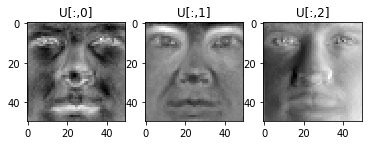

In [4]:
U_20 = get20SigularVector (training_set_c)
plt.subplot(1,3,1)
plt.imshow(U_20[:,0].reshape(50,50), cmap='gray' )
plt.title('U[:,0]')
plt.subplot(1,3,2)
plt.imshow(U_20[:,1].reshape(50,50), cmap='gray')
plt.title('U[:,1]')
plt.subplot(1,3,3)
plt.imshow(U_20[:,2].reshape(50,50), cmap='gray')
plt.title('U[:,2]')
plt.show()

## Problem 2
Write a function that takes as an input the training set T (a matrix composed of vectorized pictures from subset 0), a vector containing the labels of the training set (i.e., if the the i-th sample belongs to class j, the i-th entry of the labels vector is j. In this exercise j is an integer between 1 and 10), the test samples S (a matrix composed of vectorized pictures from subsets 1-4) and the corresponding labels (in a separate vector), the 20 singular vectors from the ﬁrst step, and the parameter k that denotes how many of the PCs are used. Use the Euclidean distance to classify each sample image based on its three nearest neighbors. (This is done by comparing the test samples with the training samples in the reduced space.) As an output give the fraction of images from S that were misclassiﬁed, i.e., the error rate. 

In [5]:
# plot formatting
plt.rcParams['font.size'] = 7
plt.rcParams['lines.markersize'] = 4
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 150

In [6]:
def KNN (train_data, train_label, test_data, test_label, Uc, k):
    
    #reduce test_set and training_set by using k principle components of 20 singular vectors Uc
    test_set_reduced = np.dot(Uc[:,:k].T ,test_data)
    training_set_reduced = np.dot(Uc[:,:k].T ,train_data)
    
    #calculate the Euclidean_distance of each test sample with all the training sets, the results are storaged in matrix Euclidean_distance
    Euclidean_distance = np.zeros((test_label.shape[1],training_label.shape[1]))
    for i in range(test_label.shape[1]):
        Euclidean_distance[i,:] =  np.sqrt(np.sum((np.expand_dims(test_set_reduced[:,i],axis=1) - training_set_reduced)**2,axis=0))
    
    #find the index of three nearest neighbours of each test_set, index sorage in matrix NN  
    NN = np.argsort(Euclidean_distance,axis=1) 
    n_NN = 3
    NN = NN[:,0:n_NN]
    
    #do the prediction according to the three nearest neighbours
    #when none of the three nearest neighbours has the same label, then the prediction is the label of the nearest neighbour
    #when two of the three nearest neighbours or all have same label, then the prediction is the label of the same label
    prediction = np.zeros((NN.shape[0],1))
    for i in range (NN.shape[0]):
        if training_label[0,NN[i,0]] !=  training_label[0,NN[i,1]] and  training_label[0,NN[i,1]] !=  training_label[0,NN[i,2]] and  training_label[0,NN[i,0]] !=  training_label[0,NN[i,2]]:
            prediction[i,0] = training_label[0,NN[i,0]]
        elif training_label[0,NN[i,0]] == training_label[0,NN[i,1]]:
            prediction[i,0] = training_label[0,NN[i,0]]
        elif training_label[0,NN[i,0]] == training_label[0,NN[i,2]]:
             prediction[i,0] = training_label[0,NN[i,0]]
        elif training_label[0,NN[i,1]] == training_label[0,NN[i,2]]: 
             prediction[i,0] = training_label[0,NN[i,1]]               
    
    #count the number of wrong classification,by comparing the the test_label and prediction_label
    #return the error_rate
    d=np.argwhere(prediction.T!=test_label)
    error_rate = len(d)/test_label.shape[1]
    return error_rate


Repeat this for subsets 1 through 4 and for k = 1,...,20. Plot the error rate for each subset. 

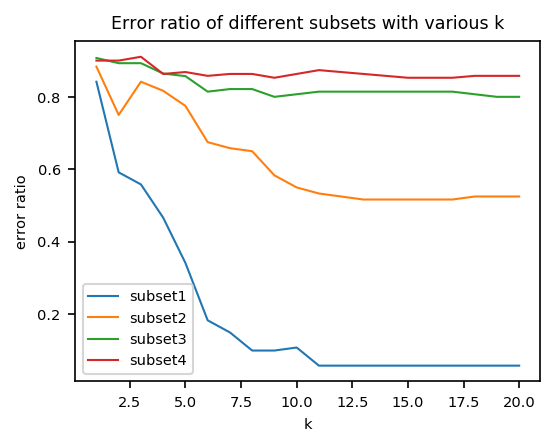

In [7]:
test_subset=['subset1','subset2','subset3','subset4']
picture_start_end = np.array([[8,19],[20,31],[32,45],[46,64]])
picture_per_person = picture_start_end[:,1]-picture_start_end[:,0]+1

error = [[],[],[],[]]
n_principleComponent = list(range(1,21))

#during each iteration, one single subset ist import as test_set and the label as test_label
for m,n in enumerate(test_subset):
    test_set=np.zeros((2500, n_Person * picture_per_person[m]))
    test_label=np.zeros((1, n_Person * picture_per_person[m]))
    for j in range(n_Person):
        for k in range(picture_per_person[m]):
            test_set[:,j * picture_per_person[m] + k]=np.float64(imageio.imread('../Assignment 2/yaleBfaces/'+ n +'/'+'person%02d'%(j+1)+'_'+'%02d.png'%(k+picture_start_end[m,0])).ravel())
            test_label[0,j * picture_per_person[m] + k] = j+1
    
    #the row test_set should be centered by the mean of training set (mu) 
    test_set_c= test_set - np.expand_dims(mu,axis=1)
    
    #during each iteration, KNN run iteratively 20 times with different number of principle components and return the corresponding error-rate 
    for n_pc in range(20):
        error_rate = KNN(training_set_c, training_label, test_set_c, test_label, U_20, n_pc+1)
        error[m].append(error_rate)
    
    plt.plot(n_principleComponent,error[m],label='subset{}'.format(m+1))
    plt.xlabel('k')
    plt.ylabel('error ratio')
    plt.title('Error ratio of different subsets with various k')
    plt.legend()
    

## Problem 3
Repeat the above experiment without using the ﬁrst three singular vectors, i.e., use k = 1,...,17 singular vectors starting from the 4-th. Plot the error rate as before. How do you explain the diﬀerence in recognition rate?

In [11]:
#get the siglular vector without the first three singular vector U_17
U_17 = U_20[:,3:20]
U_17.shape

(2500, 17)

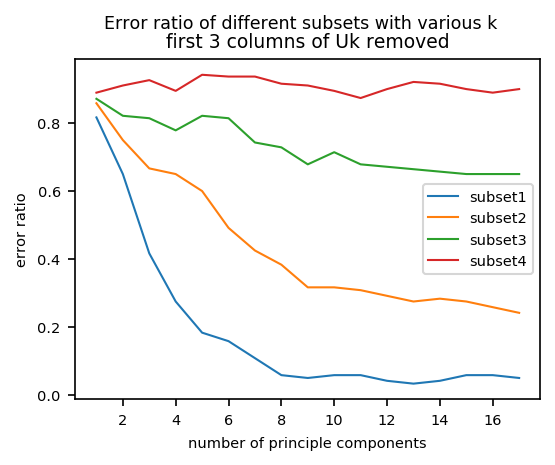

In [12]:
# most parts of this experiment are the same as expriment with 20 sigular vectors 
# in function KNN, input U_17 (the sigular matric without the first three sigular vectors)

n_principleComponent17 = list(range(1,18))
error_17 = [[],[],[],[]]

for m,n in enumerate(test_subset):
    test_set=np.zeros((2500, n_Person * picture_per_person[m]))
    test_label=np.zeros((1, n_Person * picture_per_person[m]))
    for j in range(n_Person):
        for k in range(picture_per_person[m]):
            test_set[:,j * picture_per_person[m] + k]=np.float64(imageio.imread('../Assignment 2/yaleBfaces/'+ n +'/'+'person%02d'%(j+1)+'_'+'%02d.png'%(k+picture_start_end[m,0])).ravel())
            test_label[0,j * picture_per_person[m] + k] = j+1

    test_set_c=test_set-np.expand_dims(mu,axis=1)
    
    for n_pc in range(17):
        error_rate = KNN(training_set_c, training_label, test_set_c, test_label, U_17, n_pc+1)
        error_17[m].append(error_rate)
    
    plt.plot(n_principleComponent17,error_17[m],label='subset{}'.format(m+1))
    plt.xlabel('number of principle components')
    plt.ylabel('error ratio')
    plt.suptitle('Error ratio of different subsets with various k')
    plt.title('first 3 columns of Uk removed',fontsize=9)
    plt.legend()
        

To compare the results of two experiments,the results of each subset are plotted in the same graph. 

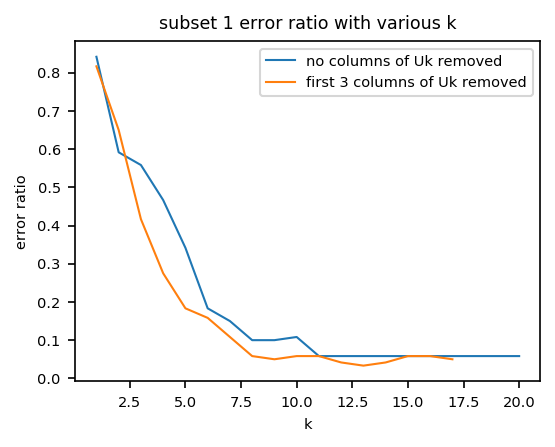

In [13]:
plt.plot(n_principleComponent,error[0],label='no columns of Uk removed')
plt.plot(n_principleComponent17, error_17[0],label='first 3 columns of Uk removed')
plt.title("subset 1 error ratio with various k")
plt.ylabel('error ratio')
plt.xlabel('k')
plt.legend()

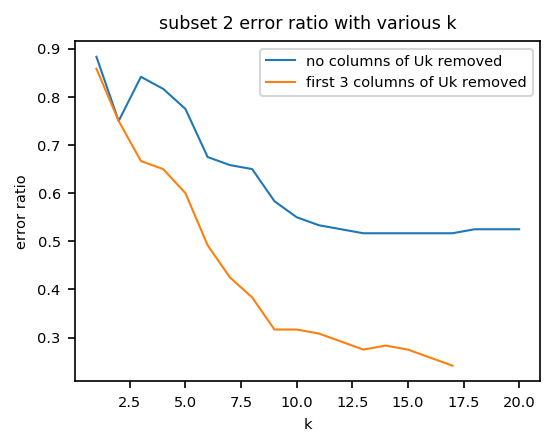

In [14]:
plt.plot(n_principleComponent,error[1],label='no columns of Uk removed')
plt.plot(n_principleComponent17, error_17[1],label='first 3 columns of Uk removed')
plt.title("subset 2 error ratio with various k")
plt.ylabel('error ratio')
plt.xlabel('k')
plt.legend()

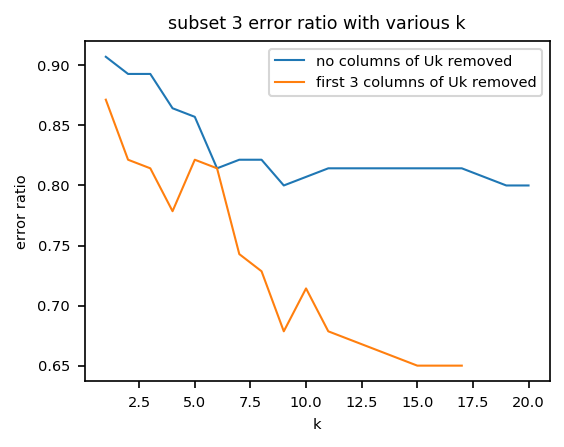

In [15]:
plt.plot(n_principleComponent,error[2],label='no columns of Uk removed')
plt.plot(n_principleComponent17, error_17[2],label='first 3 columns of Uk removed')
plt.title("subset 3 error ratio with various k")
plt.ylabel('error ratio')
plt.xlabel('k')
plt.legend()

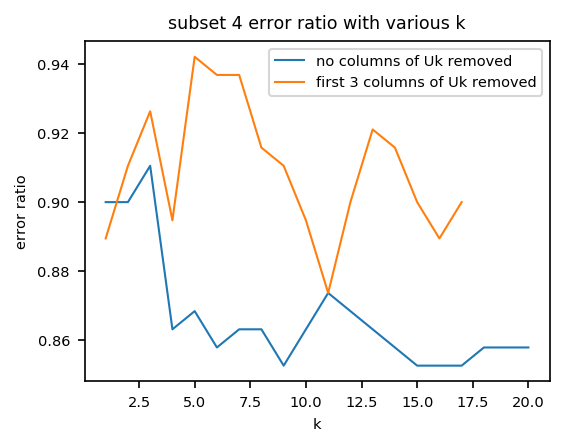

In [16]:
plt.plot(n_principleComponent,error[3],label='no columns of Uk removed')
plt.plot(n_principleComponent17, error_17[3],label='first 3 columns of Uk removed')
plt.title("subset 4 error ratio with various k")
plt.ylabel('error ratio')
plt.xlabel('k')
plt.legend()

### Conclusion and Analysis
- The error rate without the first three singular vectors is generally lower than that with all these vectors, as subset 1,2,3 shows. However, this is not true for subset 4. This may because of the lighting condition in Subset 4, which is too dark compared with subset 0. 
- As we can see from the pictures generated from the first three singular vectors in problem (1), the image from U[:; 0] (the first sigular vector) is mostly affected by the lighting condition, and the facial characteristics are not clear until the
image from U[:; 2] (the third sigular vector). Considering that the overall brighness varies over the subsets, the first three principal components probably contain the brightness information. In this face recgonition task, the illumination  condition should
be considered as interference, and the facial character is the actual useful
information. In this term, without the interference of the fisrt three signal vectors the face recognition system generally performs better. 
